### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import joblib

###Import dataset

In [83]:
data = "/content/delhi_aqi.csv"
df = pd.read_csv(data)
df.head()

,date,AQI,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,1/1/2022 0:00,298.9,2109.53,2.12,50.04,5.54,18.84,249.29,279.58,5.19
1,1/1/2022 1:00,322.9,2429.96,9.95,54.84,1.37,23.13,272.61,307.99,7.47
2,1/1/2022 2:00,374.8,3311.16,36.21,58.95,0.01,31.47,324.96,375.67,11.53
3,1/1/2022 3:00,407.0,4058.84,67.06,59.63,0.70,36.72,359.59,420.97,13.05
4,1/1/2022 4:00,410.4,4219.06,75.10,61.69,5.59,41.48,364.71,426.96,13.55


In [84]:
#Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

df

,date,AQI,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2022-01-01 00:00:00,298.9,2109.53,2.12,50.04,5.54,18.84,249.29,279.58,5.19
1,2022-01-01 01:00:00,322.9,2429.96,9.95,54.84,1.37,23.13,272.61,307.99,7.47
2,2022-01-01 02:00:00,374.8,3311.16,36.21,58.95,0.01,31.47,324.96,375.67,11.53
3,2022-01-01 03:00:00,407.0,4058.84,67.06,59.63,0.70,36.72,359.59,420.97,13.05
4,2022-01-01 04:00:00,410.4,4219.06,75.10,61.69,5.59,41.48,364.71,426.96,13.55
...,...,...,...,...,...,...,...,...,...,...
8587,2022-12-31 19:00:00,225.1,1949.31,0.25,55.52,18.24,18.60,174.78,209.27,5.76
8588,2022-12-31 20:00:00,218.4,1789.09,0.24,47.98,17.34,16.69,168.08,198.76,5.32
8589,2022-12-31 21:00:00,218.7,1735.69,0.36,43.87,14.31,16.45,168.37,197.65,5.38
8590,2022-12-31 22:00:00,221.0,1695.63,0.61,41.13,10.64,16.69,170.73,199.59,5.57


### Data Statistics

In [4]:
#
summary_statistics = df.describe()
summary_statistics

,date,AQI,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,8592,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000,8592.000000
mean,2022-07-01 19:15:25.139664640,248.728026,2741.547195,31.152407,63.041151,62.372230,64.150577,214.282541,275.445919,24.652510
min,2022-01-01 00:00:00,49.300000,260.350000,0.000000,4.280000,0.000000,7.150000,11.830000,16.660000,0.250000
25%,2022-04-02 11:45:00,160.800000,988.010000,0.580000,32.220000,0.510000,34.330000,74.565000,105.947500,9.630000
50%,2022-06-30 23:30:00,195.200000,1708.980000,4.300000,50.735000,30.040000,51.500000,141.020000,193.910000,17.480000
75%,2022-09-30 11:15:00,327.800000,3417.970000,31.290000,78.830000,97.270000,78.200000,277.510000,356.652500,30.150000
max,2022-12-31 23:00:00,499.700000,20721.440000,500.680000,444.170000,635.150000,579.830000,1599.590000,1826.340000,287.770000
std,NaN,127.533374,2723.515225,59.752539,47.543627,79.810405,46.367670,208.678645,248.895359,25.493941


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592 entries, 0 to 8591
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    8592 non-null   datetime64[ns]
 1   AQI     8592 non-null   float64       
 2   co      8592 non-null   float64       
 3   no      8592 non-null   float64       
 4   no2     8592 non-null   float64       
 5   o3      8592 non-null   float64       
 6   so2     8592 non-null   float64       
 7   pm2_5   8592 non-null   float64       
 8   pm10    8592 non-null   float64       
 9   nh3     8592 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 671.4 KB


### Overview data

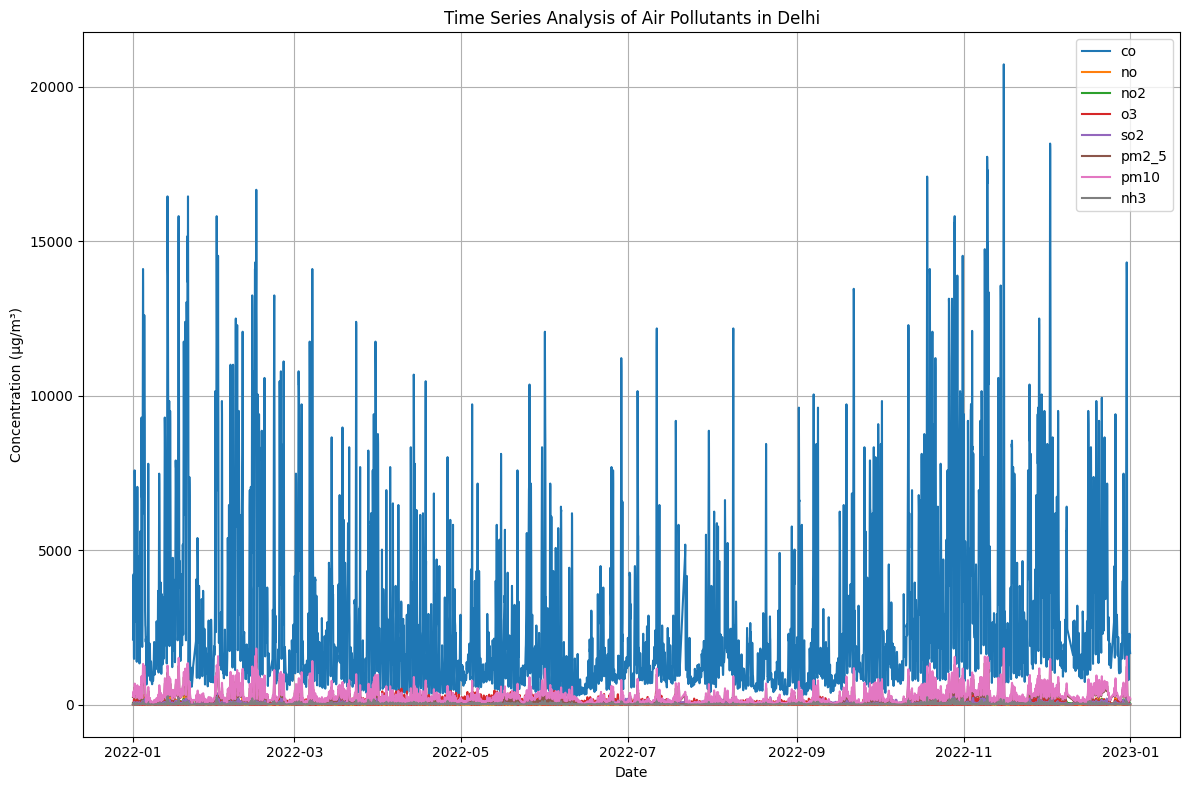

In [6]:
#Time series plot for each pollutant
plt.figure(figsize=(12, 8))

for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']:
    plt.plot(df['date'], df[pollutant], label=pollutant)

# Plotting the results
plt.title('Time Series Analysis of Air Pollutants in Delhi')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()

Heatmap of Pollutants Contributors

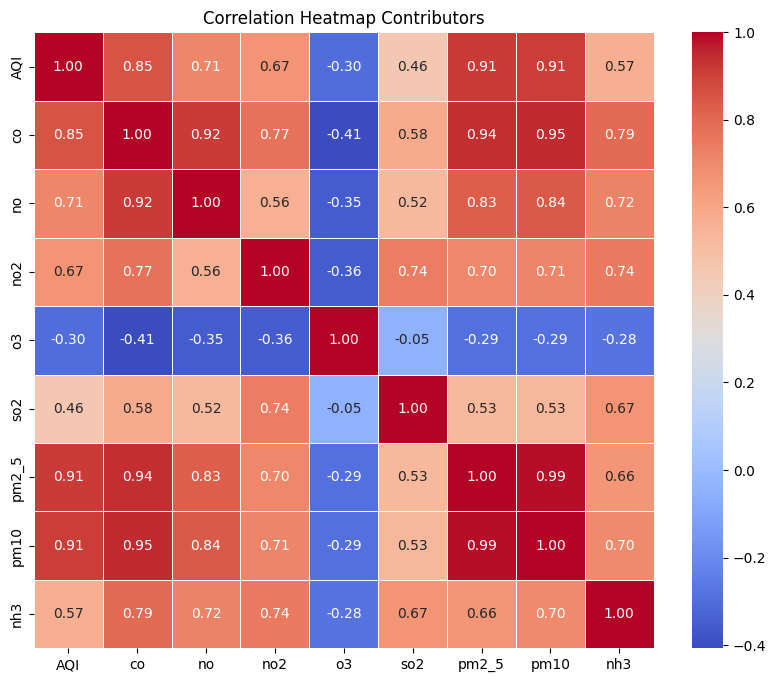

In [38]:
# Select the relevant columns
corr_columns = ['AQI', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Calculate the correlation matrix
correlation_matrix = df[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap Contributors')
plt.show()

### AQI (Air Quality Index)

In [7]:
# Define AQI categories
aqi_categories = [
    (0, 50, 'Good',  'green'), (51, 200, 'Unhealthy', 'yellow'), (201, 300, 'Very Unhealthy', 'purple'),
     (301, 500, 'Hazardous', 'maroon')
]

def categorize_aqi(aqi_value):
    for low, high, category, color in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

AQI Overtime

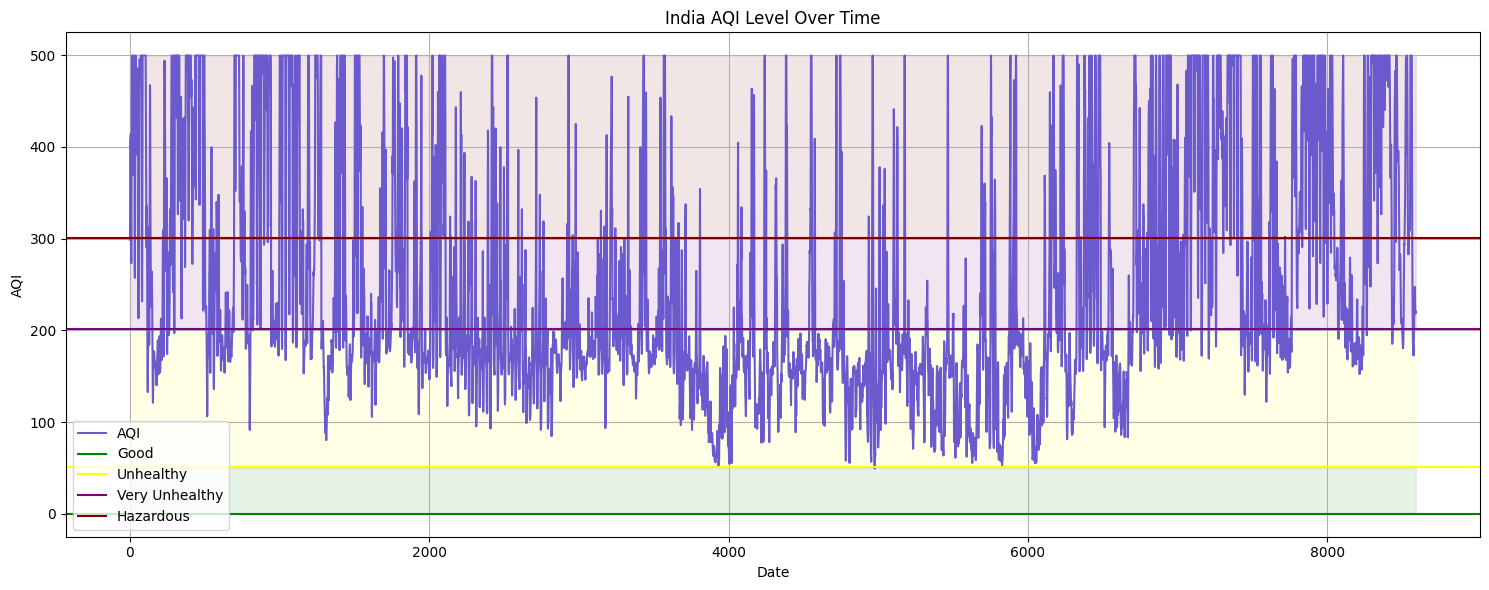

In [8]:
plt.figure(figsize=(15, 6))
df['AQI'].plot(kind='line', color='slateblue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('India AQI Level Over Time')

# Add horizontal lines and shaded areas for unhealthy levels
for low, high, category, color in aqi_categories:
    plt.axhline(y=low, color=color, linestyle='-', label=category)
    plt.fill_between(df.index, low, high, color=color, alpha=0.1)

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

Average AQI Week

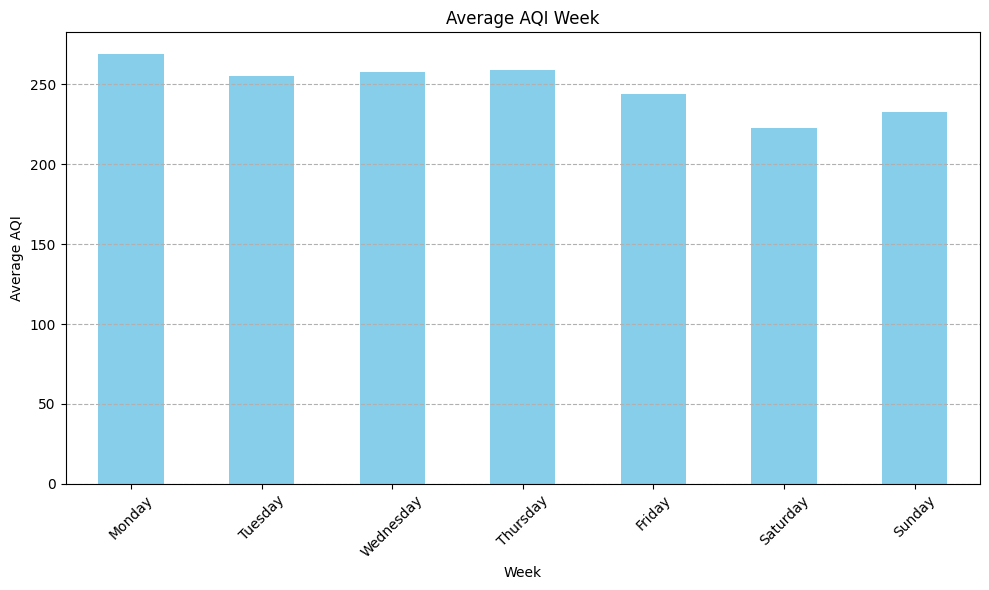

In [85]:
# Average AQI by Day of the Week
df['day'] = df['date'].dt.day_name()
average_aqi_by_day = df.groupby('day')['AQI'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the results
plt.figure(figsize=(10, 6))
average_aqi_by_day.plot(kind='bar', color='skyblue')
plt.xlabel('Week')
plt.ylabel('Average AQI')
plt.title('Average AQI Week')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha = 1)
plt.tight_layout()
plt.show()

Average AQI Hour

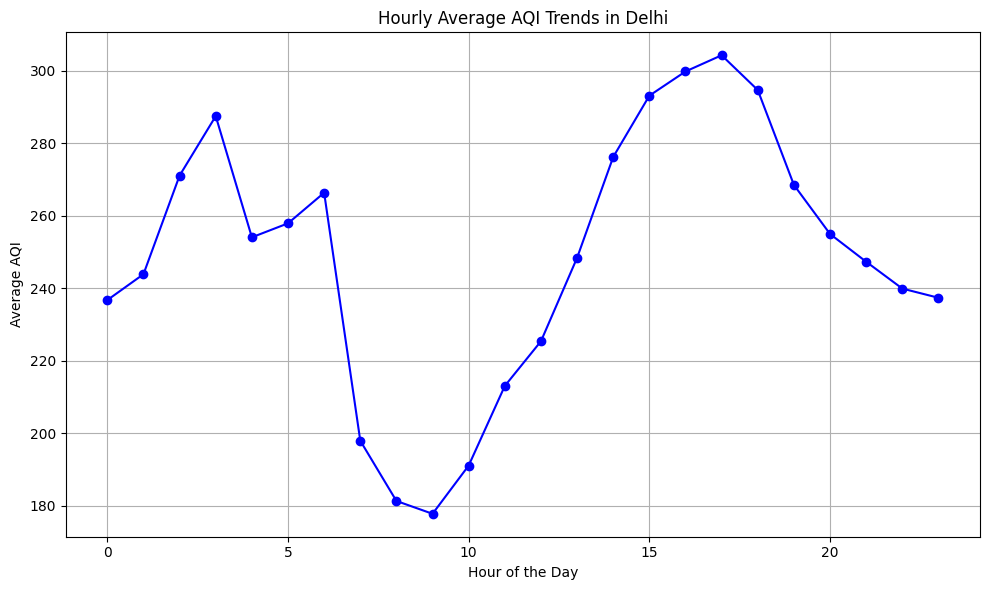

In [43]:
# Extract the hour from the date
df['Hour'] = pd.to_datetime(df['date']).dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = df.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_aqi['Hour'], hourly_avg_aqi['AQI'], marker='o', linestyle='-', color='b')

# Add title and label for graph
plt.title('Hourly Average AQI Trends in Delhi')
plt.xlabel('Hour of the Day')
plt.ylabel('Average AQI')
plt.grid(True)
plt.tight_layout()

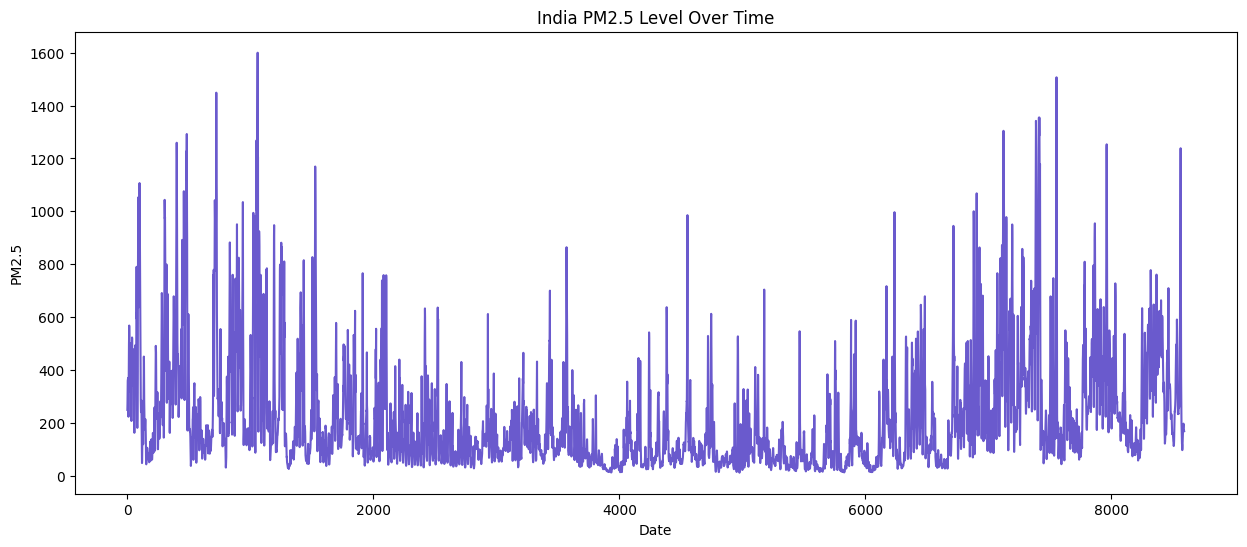

In [44]:
plt.figure(figsize=(15, 6))
df['pm2_5'].plot(kind='line', color='slateblue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('India PM2.5 Level Over Time')
plt.show()

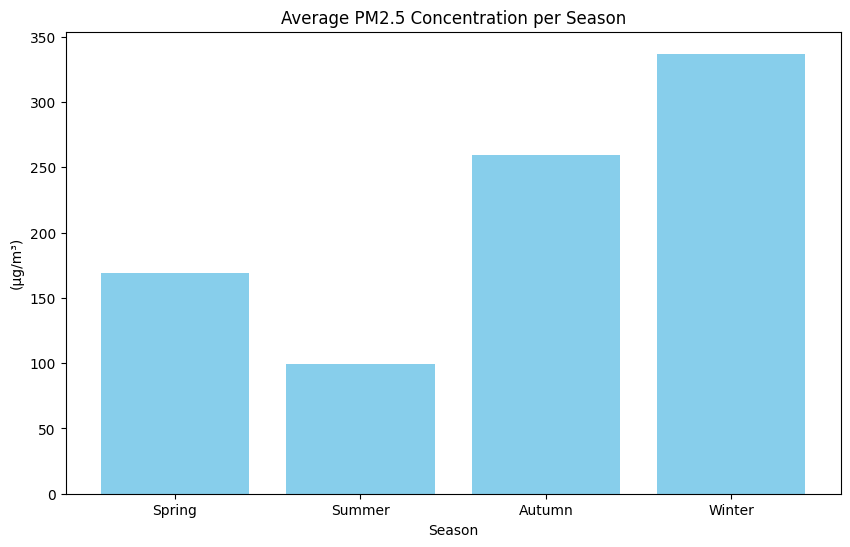

In [56]:
# Define seasons
seasons = {
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Autumn': [9, 10, 11],
    'Winter': [12, 1, 2]  # Assuming December, January, February
}

# Calculate average PM2.5 concentration for each season
seasonal_pm25 = {}
for season, months in seasons.items():
    seasonal_pm25[season] = df[df.index.month.isin(months)]['pm2_5'].mean()

# Plot the average PM2.5 concentration for each season
plt.figure(figsize=(10, 6))
bars = plt.bar(seasonal_pm25.keys(), seasonal_pm25.values(), color='skyblue')

# Add labels and title
plt.title('Average PM2.5 Concentration per Season')
plt.xlabel('Season')
plt.ylabel('(μg/m³)')

plt.show()

#### Model

In [62]:
df.drop(['date'], axis=1, inplace=True)

# Define features and target
X = df.drop("pm2_5", axis=1)
y = df["pm2_5"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

{'model': 'DecisionTreeRegressor', 'mse': 172.7033227457825, 'mae': 3.098650378126818, 'r2': 0.9961728739030853, 'rmse': 13.141663621695029}


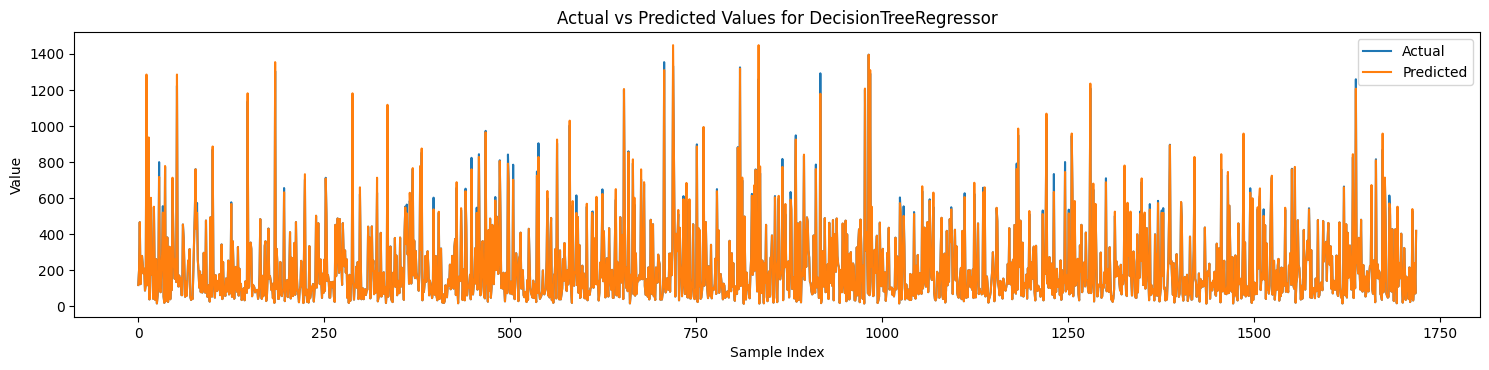

{'model': 'RandomForestRegressor', 'mse': 98.00355253285636, 'mae': 2.4162261780104743, 'r2': 0.9978282296627208, 'rmse': 9.899674364990819}


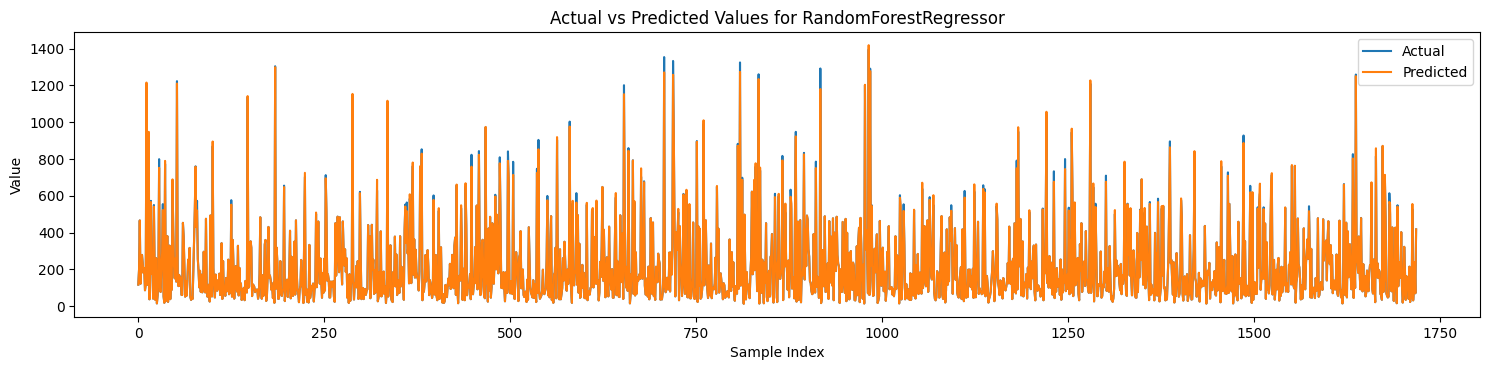

{'model': 'LinearRegression', 'mse': 879.4962739328863, 'mae': 19.395222322131364, 'r2': 0.9805102583517604, 'rmse': 29.656302431909584}


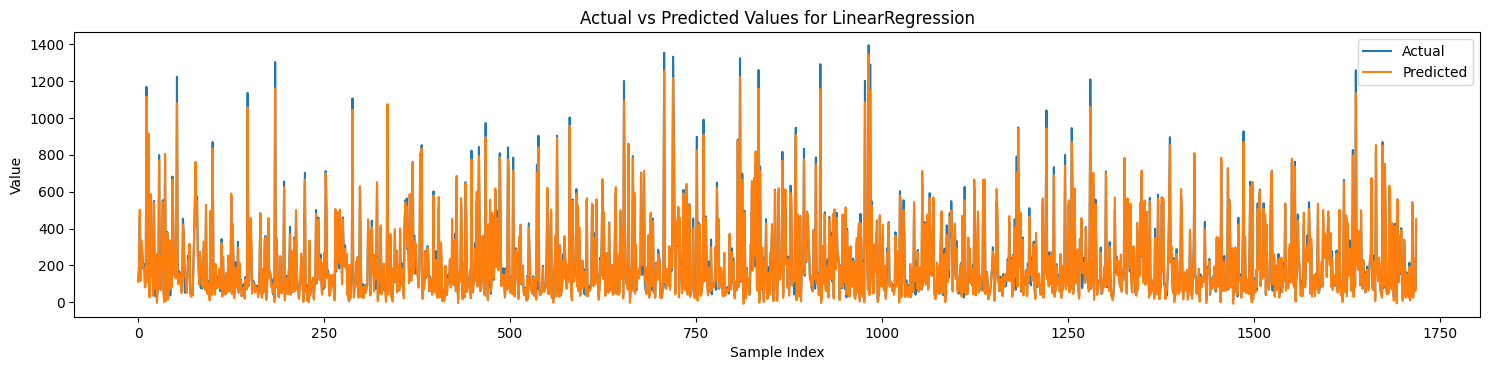

In [63]:
# Model
models = [DecisionTreeRegressor(),
         RandomForestRegressor(),
          LinearRegression()]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result = {
        'model': model.__class__.__name__,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'rmse': rmse
    }
    print(result)

    # Plotting the results
    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 2)
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(f'Actual vs Predicted Values for {type(model).__name__}')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### ARIMA

In [64]:
pm2_5 = df['pm2_5']

# Perform ADF test
adf_result = adfuller(pm2_5)
adf_result

(-8.569019693288181,
 8.294627857983803e-14,
 31,
 8560,
 {'1%': -3.431114166129132,
  '5%': -2.861877709716427,
  '10%': -2.56694975796194},
 89621.50934986435)

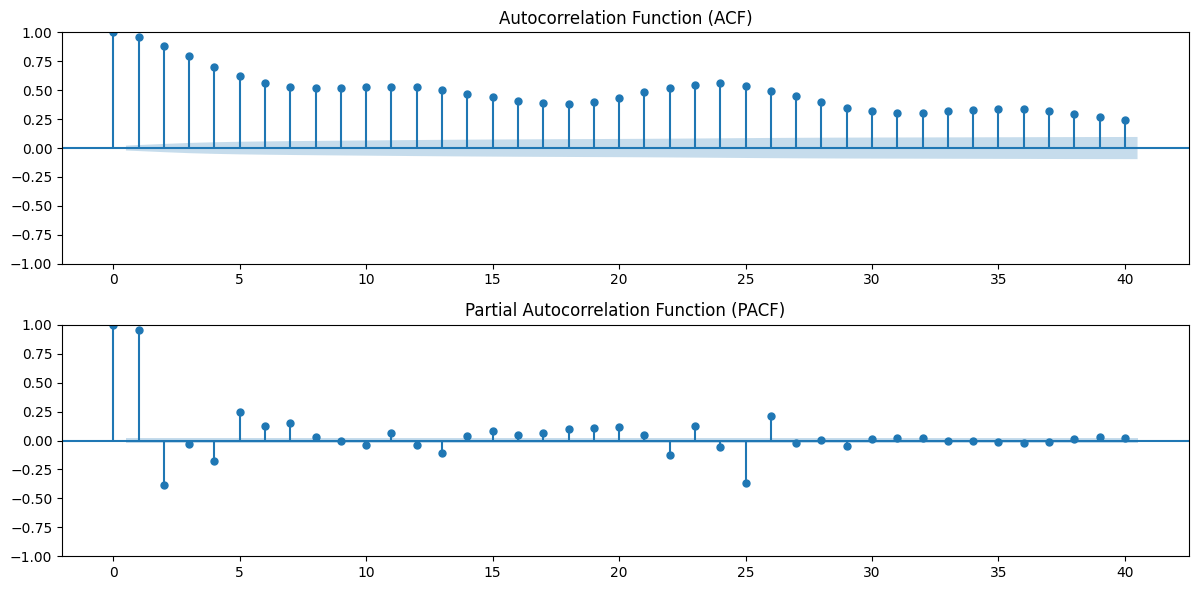

In [65]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(211)
plot_acf(pm2_5, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

plt.subplot(212)
plot_pacf(pm2_5, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [67]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(test, predictions)

    result = {
        'model_fit': model_fit,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'rmse': rmse,
        'predictions': predictions,
        'test': test,
        'train': train,
    }
    return result

In [76]:
# Use a smaller subset for quick testing
pm2_5_test = pm2_5.head(2000)

arima_order = (1, 0, 0)
arima_model = evaluate_arima_model(pm2_5_test.values, arima_order)
model_fit = arima_model['model_fit']

In [78]:
# Plotting the results
print("Mean Squared Error:", arima_model['mse'])
print("Mean Absolute Error:", arima_model['mae'])
print("Root Mean Square Deviation:", arima_model['rmse'])
print("R_squared:", arima_model['r2'])

Mean Squared Error: 3650.1877757601223
Mean Absolute Error: 35.21348930514365
Root Mean Square Deviation: 29.656302431909584
R_squared: 0.8855080447442674


In [79]:
#Save ARIMA model
joblib.dump(model_fit, 'arima_model.pkl')

['arima_model.pkl']

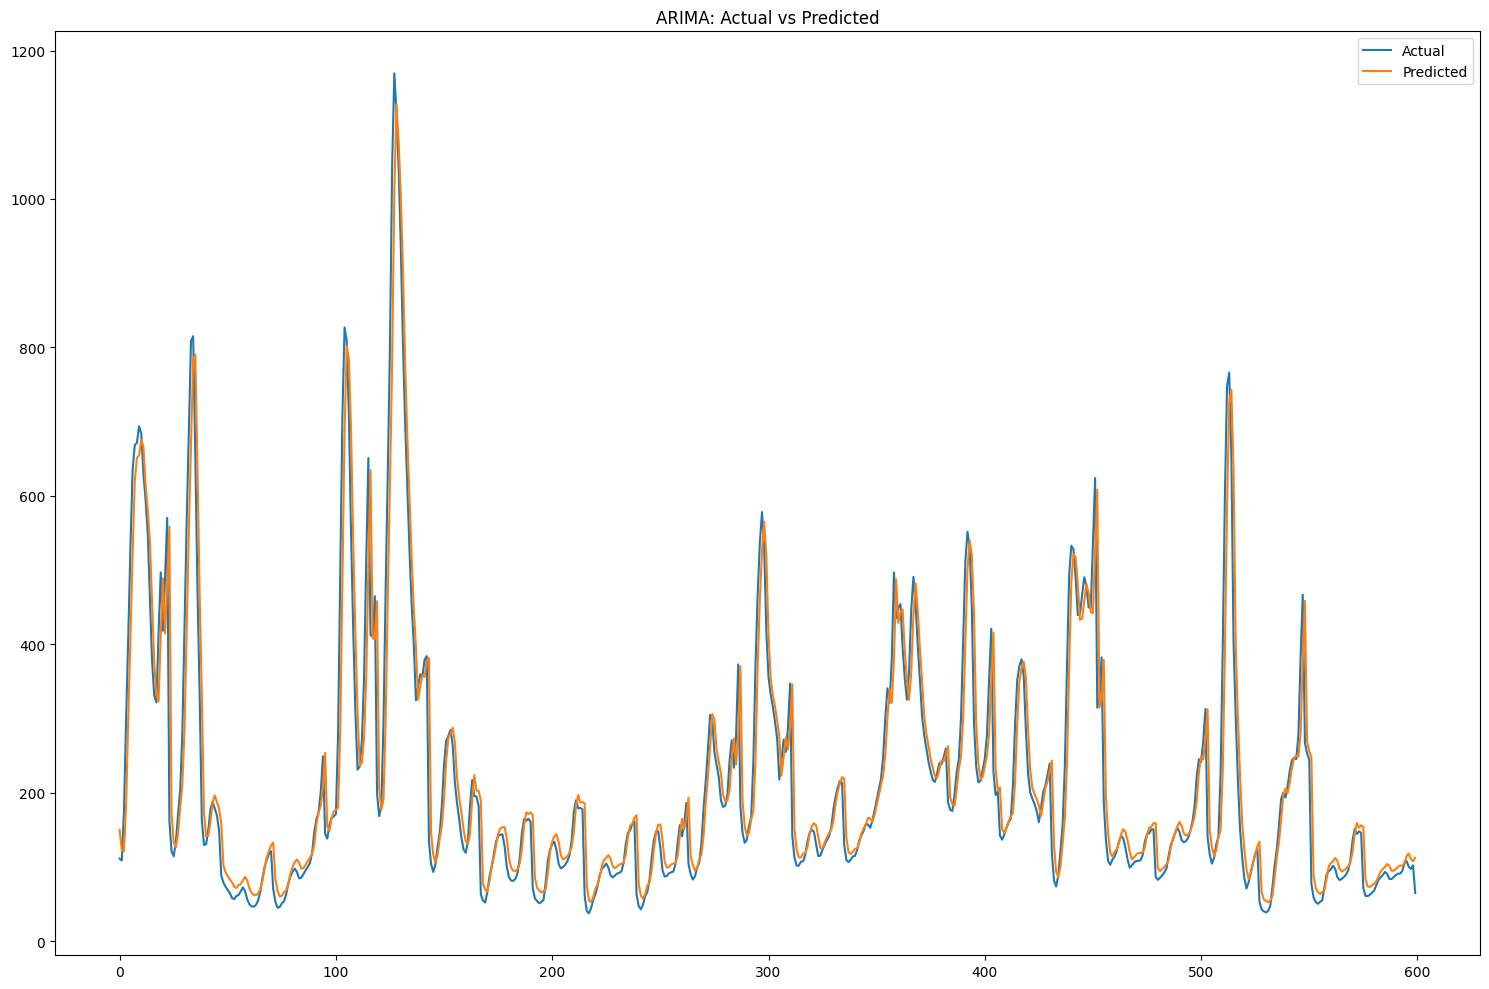

In [81]:
# Plotting the results
plt.figure(figsize=(15, 10))

# ARIMA Plot
plt.plot(arima_model['test'], label='Actual')
plt.plot(arima_model['predictions'], label='Predicted')
plt.title('ARIMA: Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()